In [2]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from packaged_folder.Functions import Basic_info_func
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from scipy import stats
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


In [3]:
#loading dataset 
df = pd.read_csv('./Data/Source_data.csv')
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.8375,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.9055,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.8900,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.7844,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.25,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,1667.383429,3306.162897,3592.019281,81.8375,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.9055,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,775.425,1

In [4]:
# Exploring data using custom function
Basic_info_func(df)

,Missing_values,N_uniques,Data_type,missing_percentage
Feature,,,,
number_of_elements,0,9,int64,0
mean_atomic_mass,0,3365,float64,0
wtd_mean_atomic_mass,0,15164,float64,0
gmean_atomic_mass,0,3365,float64,0
wtd_gmean_atomic_mass,0,15165,float64,0
entropy_atomic_mass,0,3314,float64,0
wtd_entropy_atomic_mass,0,15113,float64,0
range_atomic_mass,0,1042,float64,0
wtd_range_atomic_mass,0,12641,float64,0


In [5]:
# Describing data
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,41.448045,769.614748,870.442317,737.474751,832.769649,1.299172,0.926726,572.222612,483.517264,215.631279,224.050033,157.983101,134.720039,144.448738,120.989330,1.267756,1.131138,139.325025,51.369885,51.601267,52.340465,6111.465214,5267.188547,3460.692235,3117.241110,1.072425,0.856037,8665.438818,2902.736814,3416.910784,3319.170628,76.879751,92.717486,54.359502,72.416225,1.070250,0.770757,120.730514,59.332637,48.912207,44.409356,14.296113,13.848001,10.136977,10.141161,1.093343,0.914065,21.138994,8.218528,8.323333,7.717576,89.706911,81.549080,29.841727,27.308061,0.727630,0.539991,250.893443,62.033066,98.943993,96.234051,3.198228,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,19.983544,87.488694,143.278200,78.327275,119.772520,0.381935,0.334018,309.614442,224.042874,109.966774,127.927104,20.147288,28.801567,22.090958,35.837843,0.375411,0.407159,67.272228,35.019356,22.898396,25.294524,2846.785185,3221.314506,3703.256370,3975.122587,0.342356,0.319761,4097.126831,2398.471020,1673.624915,1611.799629,27.701890,32.276387,29.007425,31.648444,0.343391,0.285986,58.700327,28.620

In [6]:
# Shape of dataset
df.shape

(21263, 82)

## 2 EDA
###           2.1 Univariate Analysis

**Analyzing Target Variable i.e critical_temp:**

To perform the same we will create a Histogram to examine count base distribution, BoxPlot to analyze quantiles and outliers, KDE plot to examine density distribution, and a Table that contains information of Five_number summart along with std deviation.

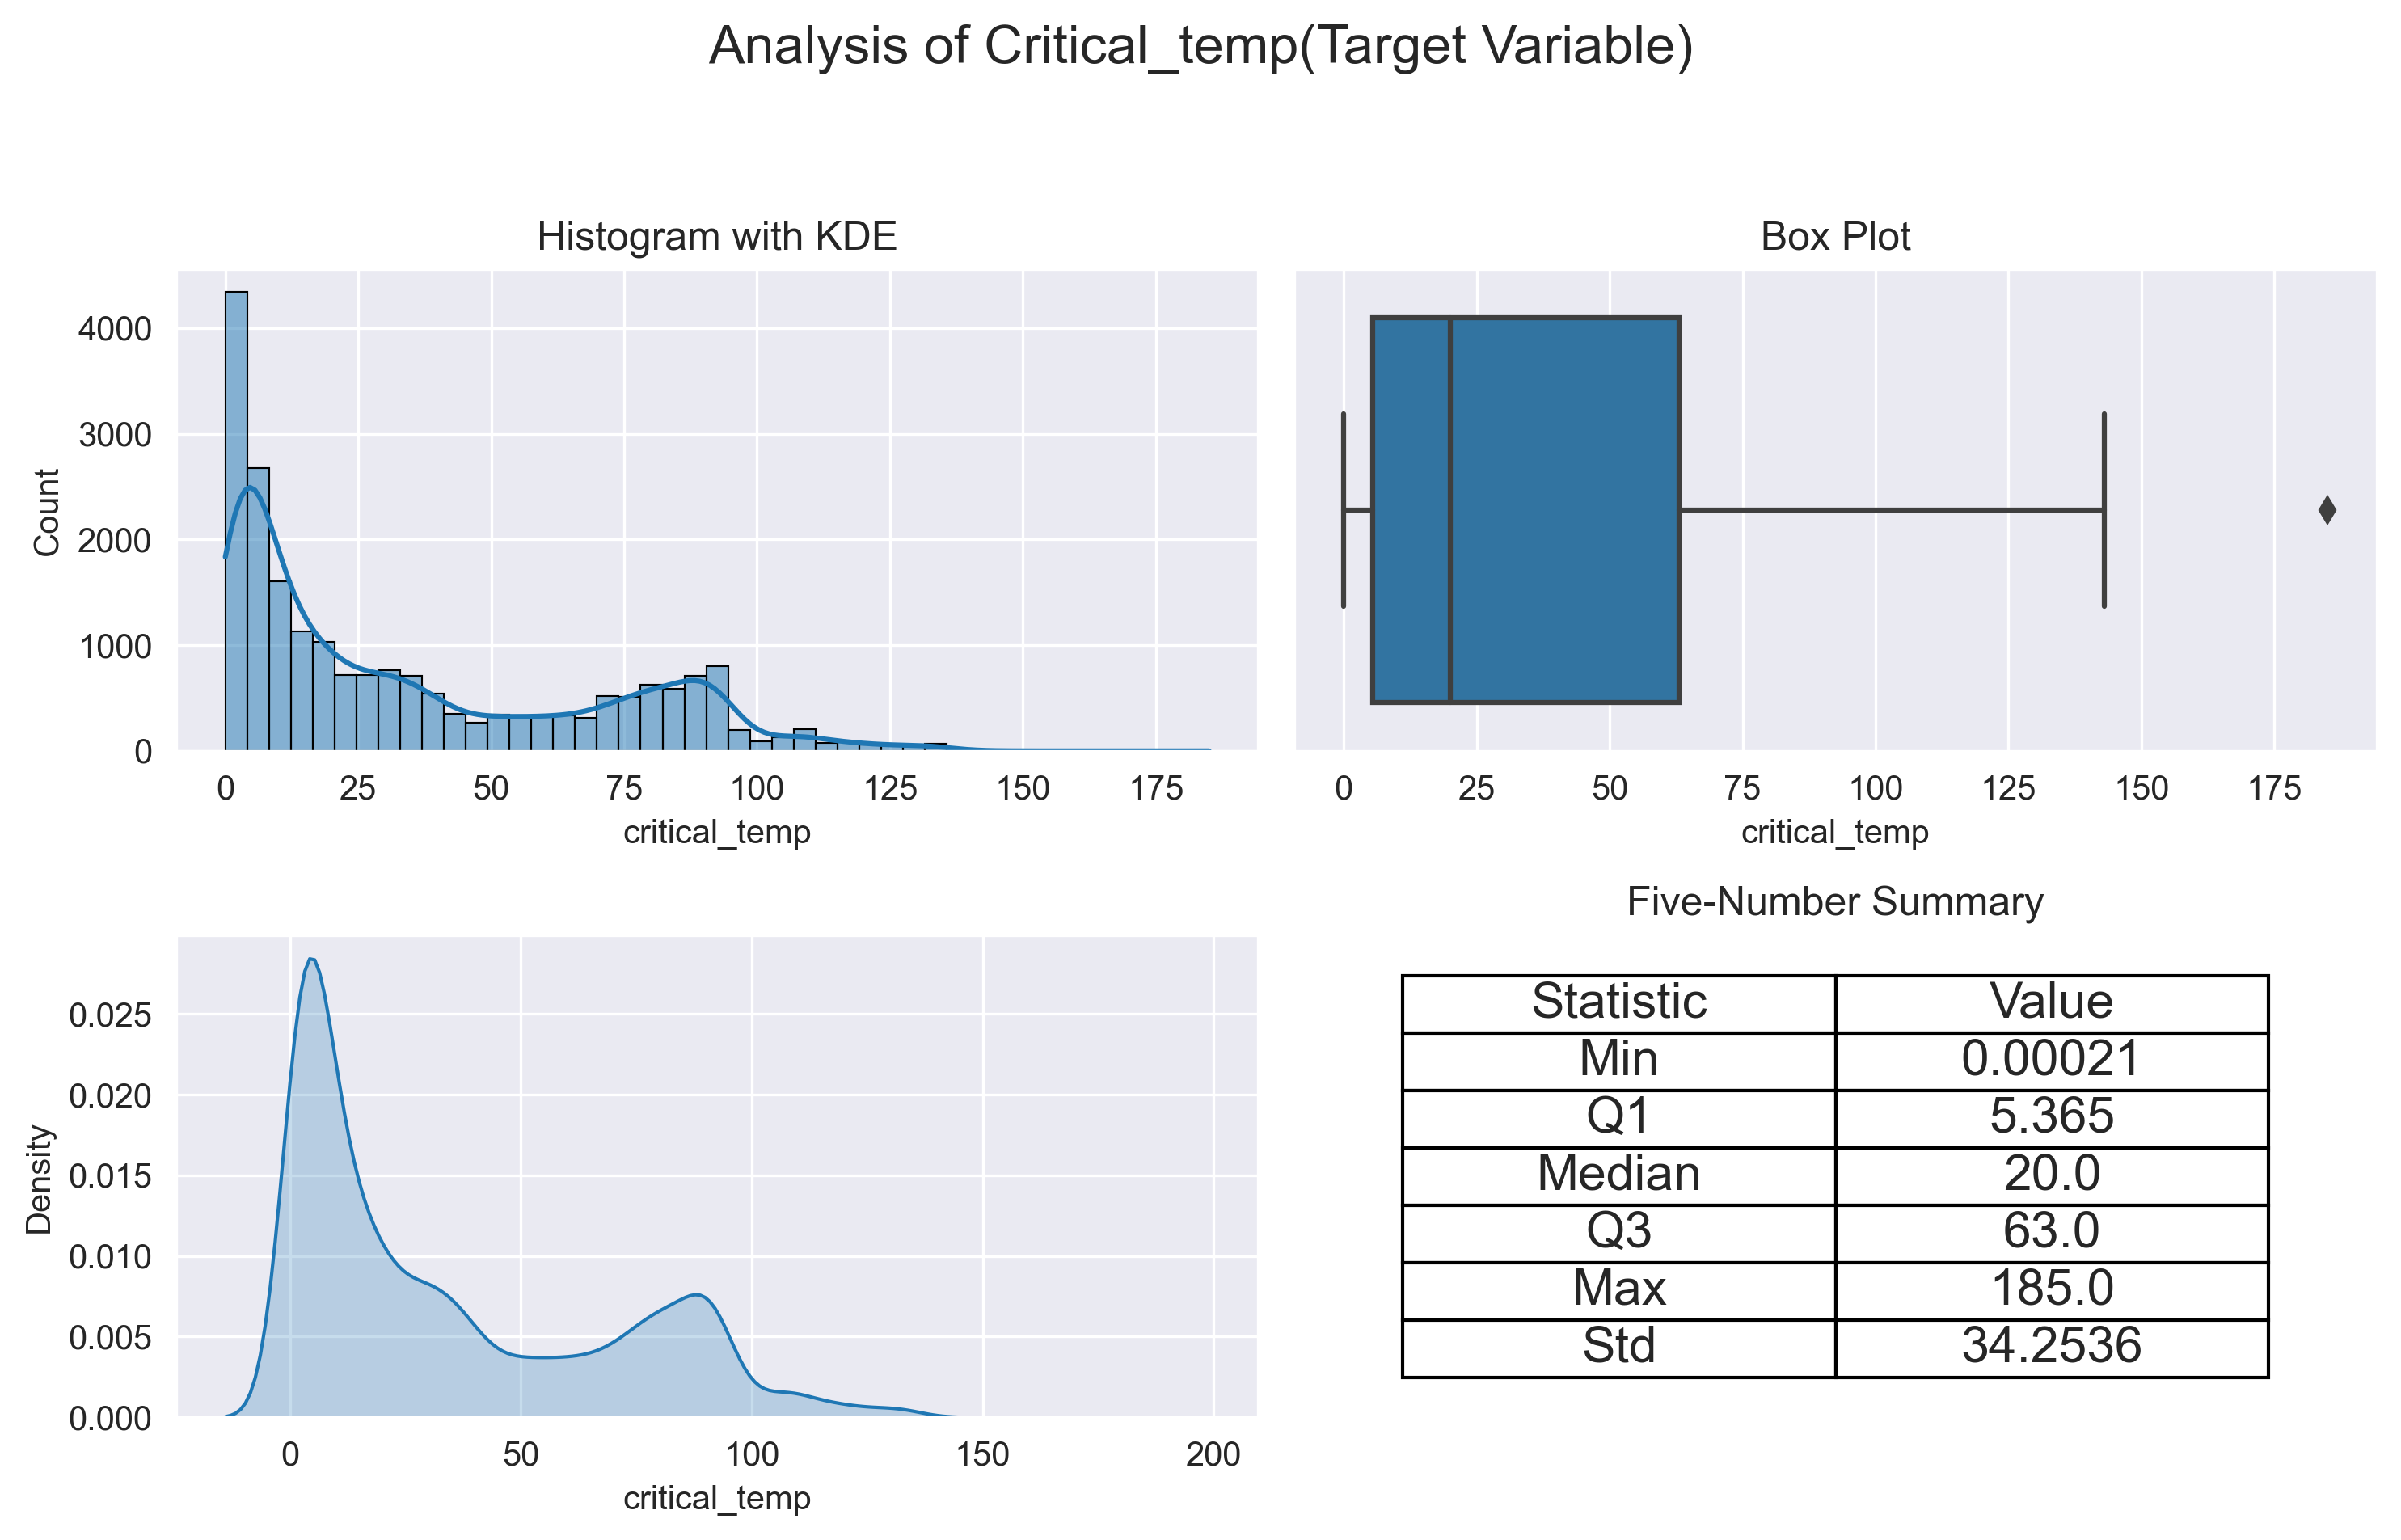

In [6]:
# Create the subplots
sns.set_style('darkgrid')
fig, ax = plt.subplots(2, 2, figsize=(10, 6), dpi = 300)

# Histogram
sns.histplot(data=df, x='critical_temp', kde=True, ax=ax[0, 0], edgecolor= 'black')
ax[0, 0].set_title('Histogram with KDE')

# Box plot
sns.boxplot(data=df, x='critical_temp', ax=ax[0, 1])
ax[0, 1].set_title('Box Plot')

# KDE plot
sns.kdeplot(data=df, x='critical_temp', ax=ax[1, 0], fill= True)
ax[1, 1].set_title('KDE Plot')


# Calculate the five-number summary
five_number_summary = np.percentile(df['critical_temp'], [0, 25, 50, 75, 100])

# Add table for five-number summary to the fourth subplot
ax[1, 1].axis('off')  # Hide the axis

# Create the table and add it to the subplot
table_data = [['Min', five_number_summary[0]],
              ['Q1', five_number_summary[1]],
              ['Median', five_number_summary[2]],
              ['Q3', five_number_summary[3]],
              ['Max', five_number_summary[4]],
              ['Std', round(np.std(df['critical_temp']), 4)]]

# Create the table and add it to the subplot
table = ax[1, 1].table(cellText=table_data, colLabels=['Statistic', 'Value'], loc='center', cellLoc='center')

# Adjust the table properties
table.auto_set_font_size(False)
table.set_fontsize(15)
table.scale(0.8, 1.5)

# Set the title for the subplot with the table
ax[1, 1].set_title('Five-Number Summary')

plt.suptitle('Analysis of Critical_temp(Target Variable)', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


**Other independent variables**

Since we have 81 features extracted for each superconductor (10 features × 8 element properties plus 1 features for the total number of elements) + Tc. It will not be good idea to analyze and conclude all features instead we will only analyze 9 element proporties using given as mean(property). These variables are

* number_of_elements
* mean_atomic_mass
* mean_fie
* mean_atomic_radius
* mean_Density
* mean_ElectronAffinity
* mean_FusionHeat
* mean_ThermalConductivity
* mean_Valence

In [7]:
# Selecting above variables in a list

element_properties = ['number_of_elements','mean_atomic_mass', 'mean_fie', 'mean_atomic_radius', 'mean_Density', 
                      'mean_ElectronAffinity', 'mean_FusionHeat', 'mean_ThermalConductivity',
                      'mean_Valence']


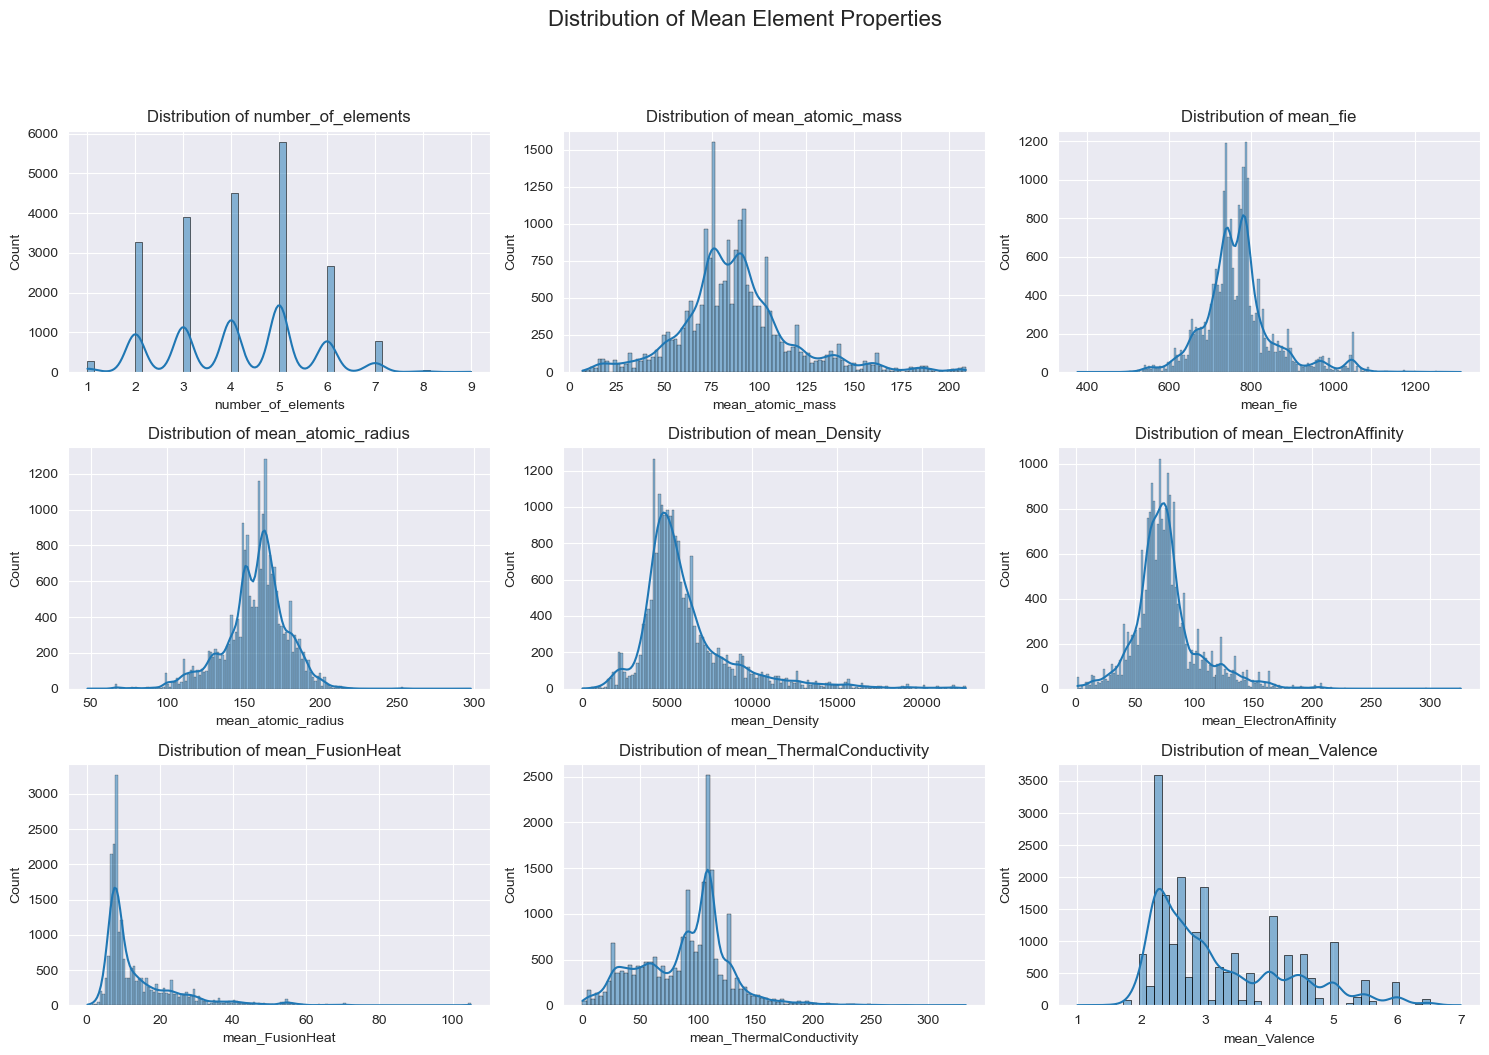

In [8]:

# Create the subplots
sns.set_style('darkgrid')
fig, ax = plt.subplots(3, 3, figsize=(15, 10))

# Flatten the axes array for easy iteration
ax_flat = ax.flatten()

# Iterate over each element property and corresponding axis
for property_name, axis in zip(element_properties, ax_flat):
    sns.histplot(data=df, x=property_name, kde=True, ax=axis, edgecolor='black')
    axis.set_title(f'Distribution of {property_name}')

# Hide empty subplots if any
for axis in ax_flat[len(element_properties):]:
    axis.axis('off')

plt.suptitle('Distribution of Mean Element Properties', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

### 2.2 Bi-Variate Analysis

In this section we will run Bi_Varaiate analysis between above selected features and critical_temp i.e Target variable for this project.

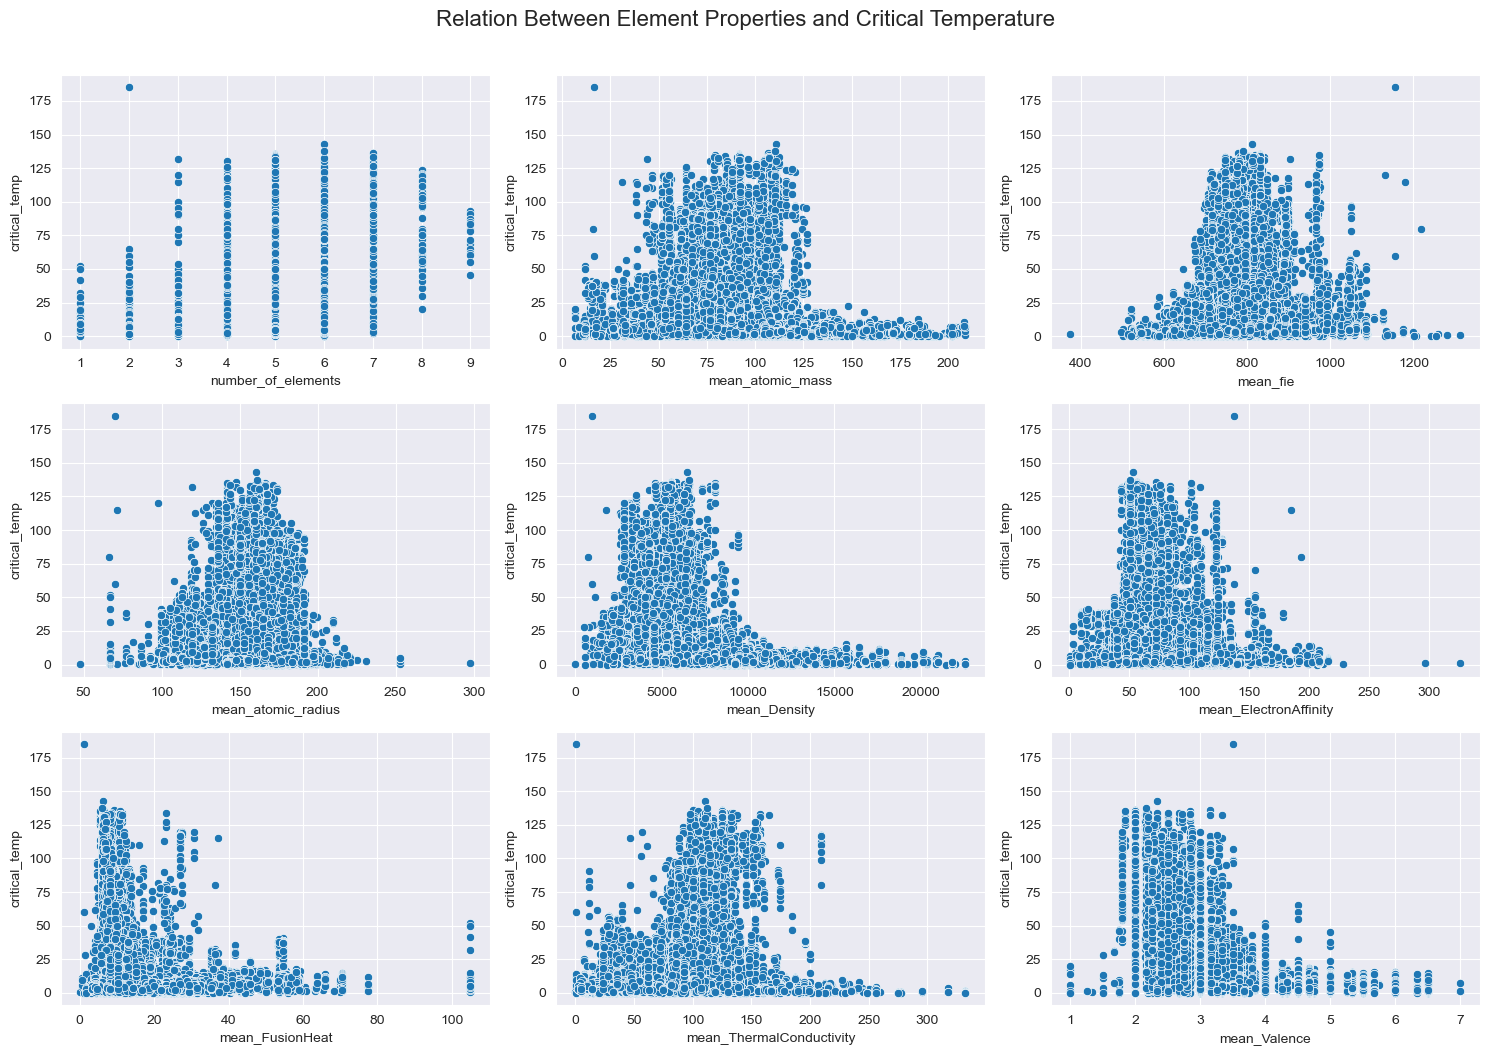

In [9]:
# Create the subplots
sns.set_style('darkgrid')
fig, ax = plt.subplots(3, 3, figsize=(15, 10))

# Flatten the axes array for easy iteration
ax_flat = ax.flatten()

# Iterate over each element property and corresponding axis
for i, property_name in enumerate(element_properties):
    sns.scatterplot(data=df, x=property_name, y='critical_temp', ax=ax_flat[i])
#     ax_flat[i].set_title(f'Relation Between {property_name} and Critical Temperature')

# Hide empty subplots if any
for axis in ax_flat[len(element_properties):]:
    axis.axis('off')

plt.tight_layout()
plt.suptitle('Relation Between Element Properties and Critical Temperature', fontsize=16, y=1.05)
plt.show()

### 2.3 Multi-Variate Analysis & Assumptions Validation

In this section we Explored correlation matrix using heatmap to analyze Multi-Varaiables and their relations with each other. This plot also helps to understand if there is any multi-colinearity in among the features.

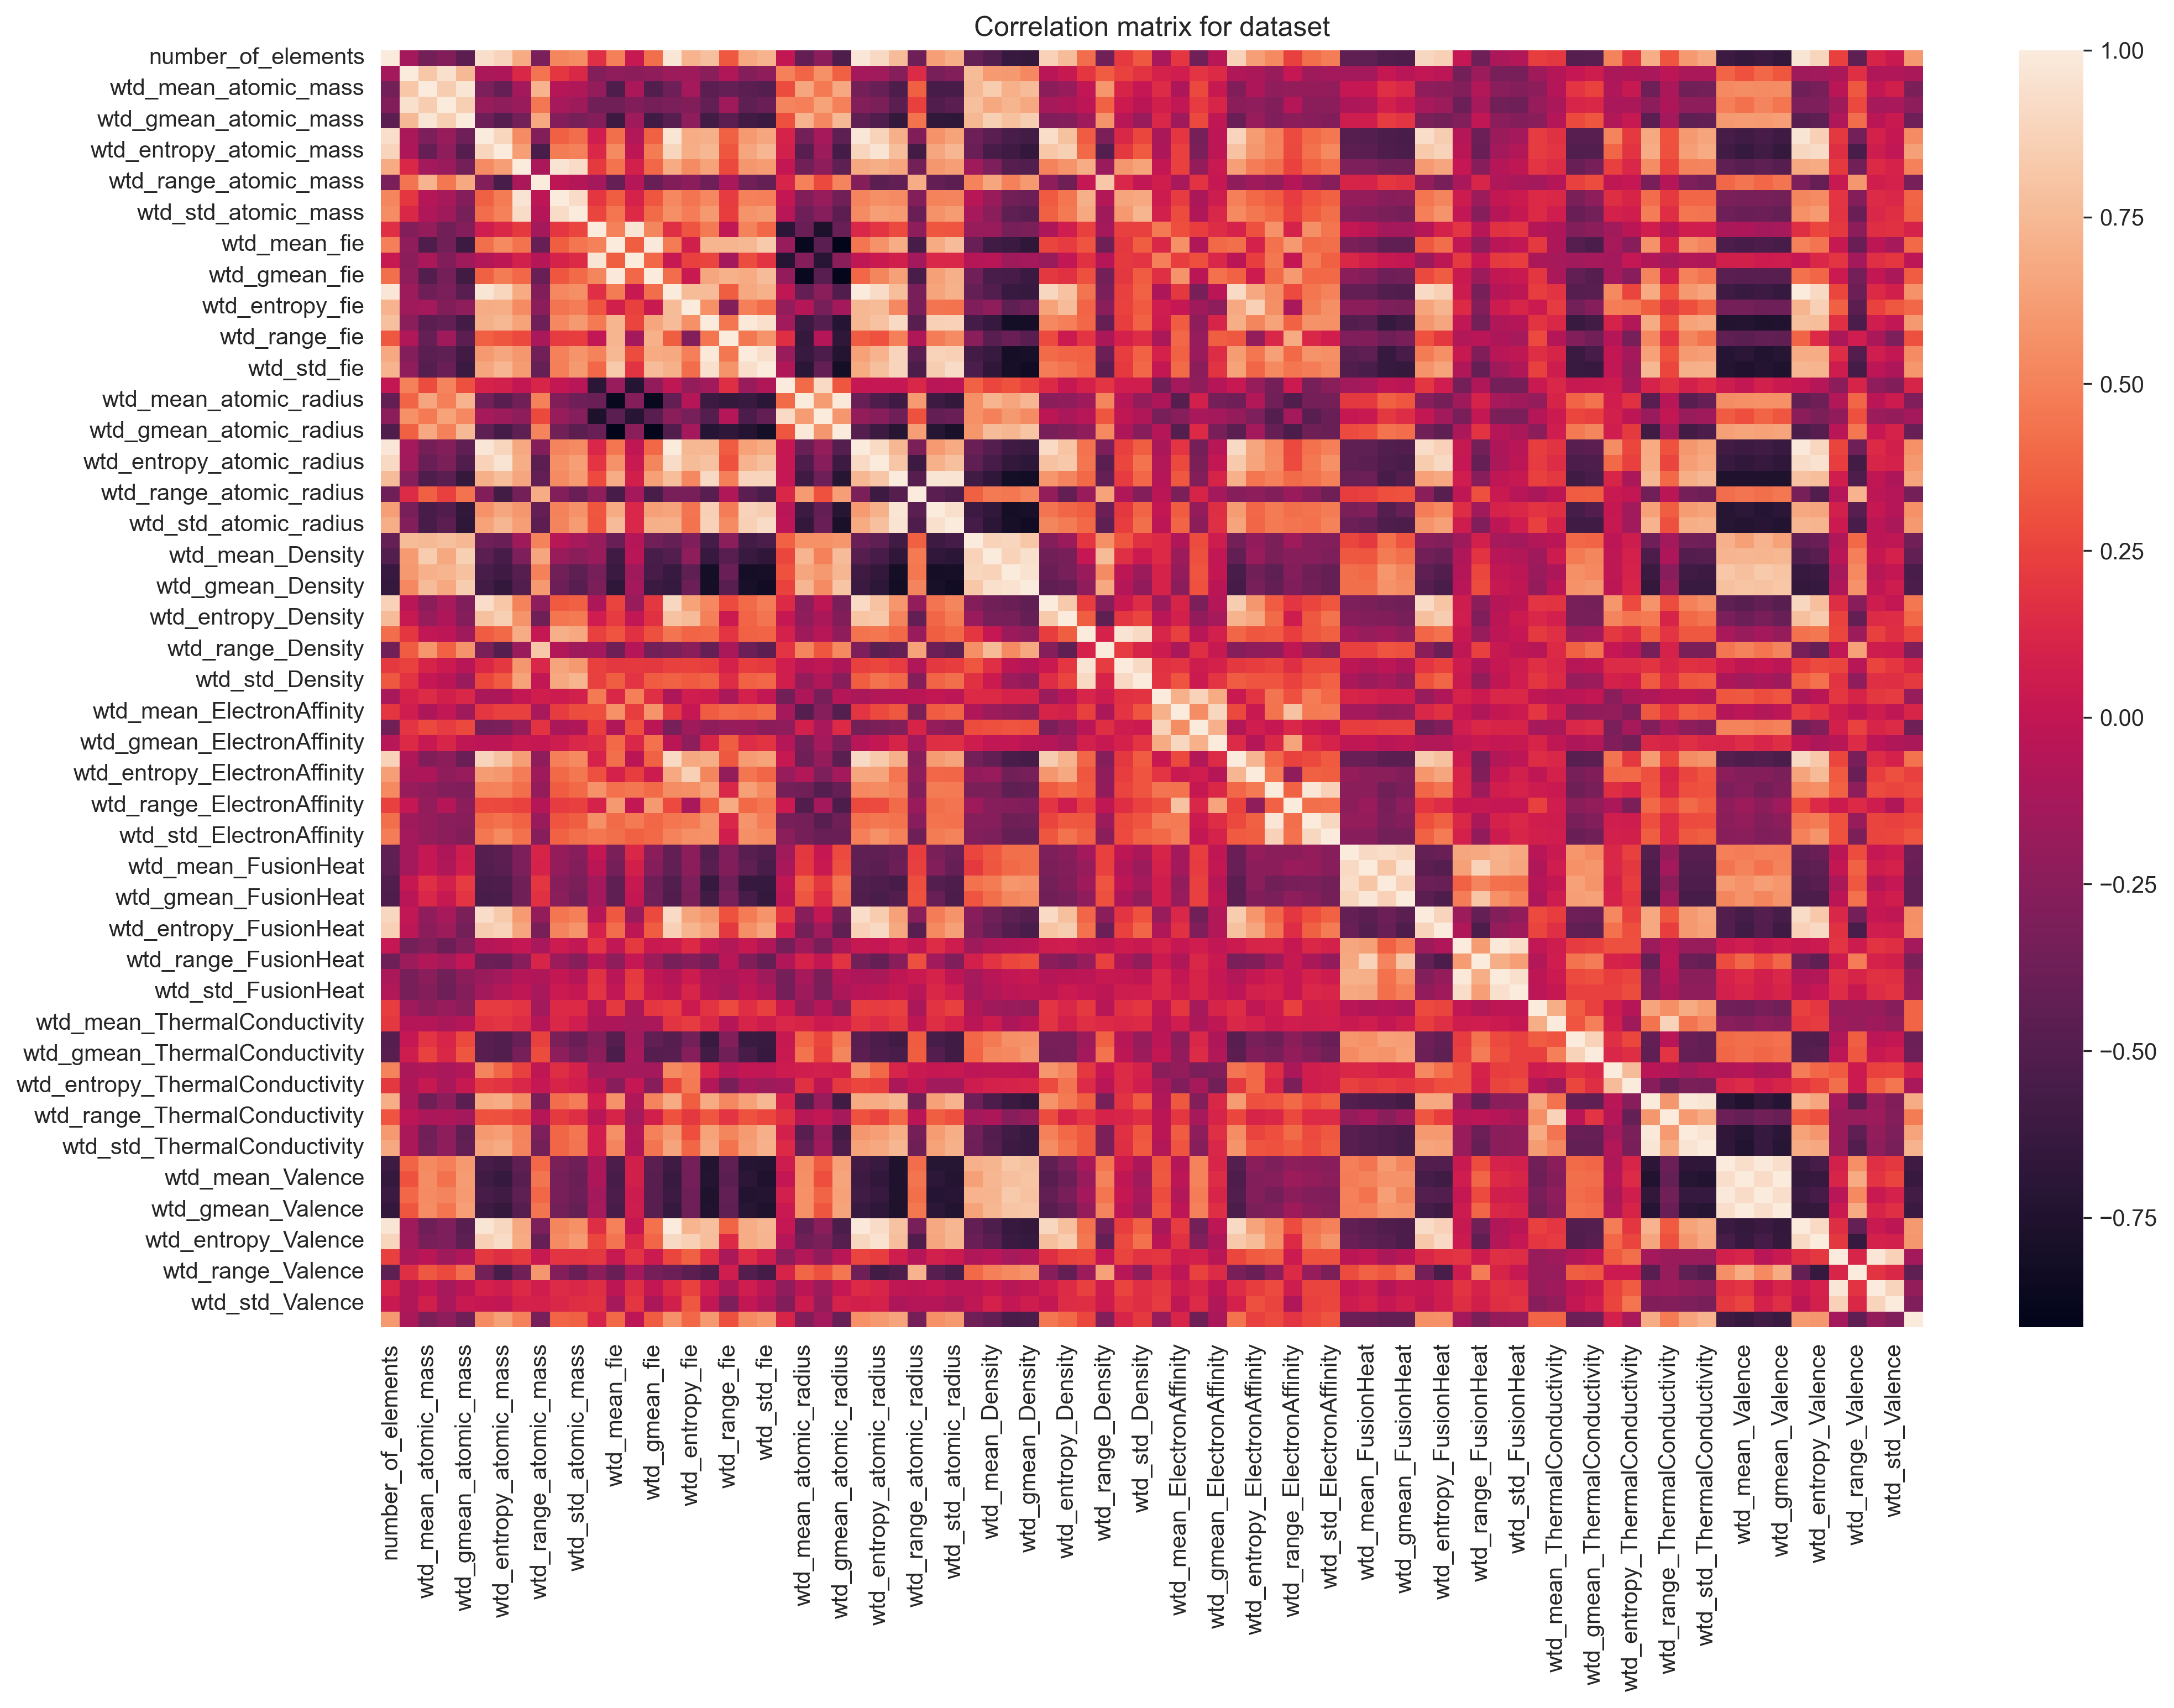

In [10]:
# Plotting heatmap to analyze correlation
plt.figure(figsize = (15,10), dpi = 300)
sns.heatmap(df.corr())
plt.title('Correlation matrix for dataset')
plt.show()

**Residuals Normalization & Heteroscedasticity Assumption Validation**


The normality assumption in linear regression refers to the assumption that the residuals (errors) of the model are normally distributed. While the estimates of regression coefficients (slopes and intercept) remain unbiased even if the residuals are not normal, they are most efficient (i.e., have the smallest variance) when the residuals are normally distributed.

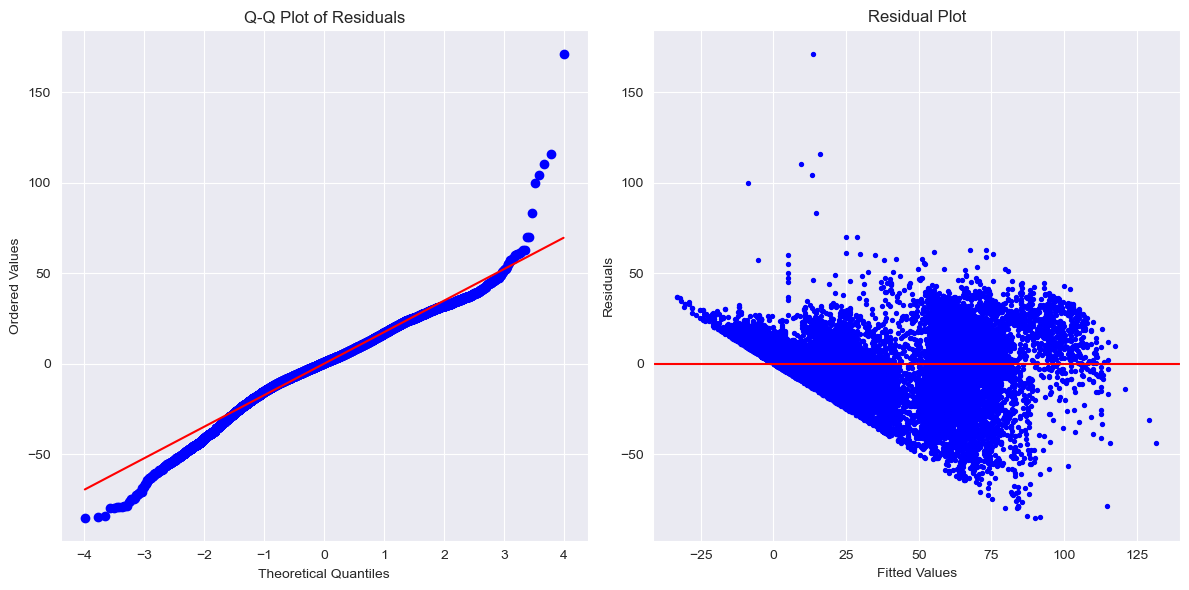

For Normalization Assumption (Kolmogorov-Smirnov Test) --> 
Kolmogorov-Smirnov Test Statistic: 0.047788290698783126
Kolmogorov-Smirnov Test p-value: 1.2262993797650276e-42 

 * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
For Homoscedasticity Validation (Breusch-Pagan Test Results) -->
Lagrange multiplier statistic: 3345.6746894394723
p-value: 0.0
f-value: 48.82834149692371
f p-value: 0.0


In [11]:
# separating independent and dependent variables
independent_variables = df.drop('critical_temp', axis=1)
target = df['critical_temp']

# Instantiate and fit linear regression model
model = LinearRegression()
model.fit(independent_variables, target)

# Predictions
preds = model.predict(independent_variables)

# Residuals
residuals = target - preds

# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=axs[0])
axs[0].set_title('Q-Q Plot of Residuals')
axs[0].set_xlabel('Theoretical Quantiles')
axs[0].set_ylabel('Ordered Values')

# Residual Plot
axs[1].scatter(preds, residuals, color='b', s=8)
axs[1].axhline(y=0, color='r', linestyle='-')
axs[1].set_title('Residual Plot')
axs[1].set_xlabel('Fitted Values')
axs[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

# Kolmogorov-Smirnov Test for residuals
print("For Normalization Assumption (Kolmogorov-Smirnov Test) --> ")
ks_test = stats.kstest(residuals, 'norm', args=(residuals.mean(), residuals.std()))
print('Kolmogorov-Smirnov Test Statistic:', ks_test.statistic)
print('Kolmogorov-Smirnov Test p-value:', ks_test.pvalue, "\n\n", "* " * 50)

# Add constant to independent variables for Breusch-Pagan test
independent_variables_with_const = sm.add_constant(independent_variables)

# Breusch-Pagan Test for the assumption of heteroscedasticity
bp_test = het_breuschpagan(residuals, independent_variables_with_const)
print('For Homoscedasticity Validation (Breusch-Pagan Test Results) -->')
print('Lagrange multiplier statistic:', bp_test[0])
print('p-value:', bp_test[1])
print('f-value:', bp_test[2])
print('f p-value:', bp_test[3])

ANOVA F-statistic: 2185.2637675998517
ANOVA p-value: 0.0
The means of critical_temp are significantly different across groups defined by no_of_elements.


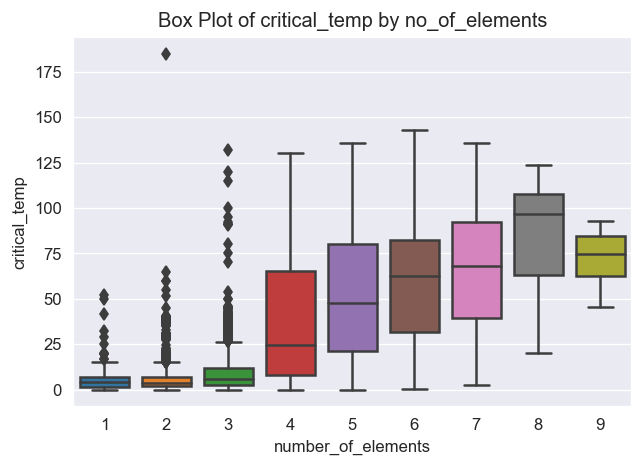

In [12]:
# Perform ANOVA
result = stats.f_oneway(df[df['number_of_elements'] == 1]['critical_temp'],
                         df[df['number_of_elements'] == 2]['critical_temp'],
                         df[df['number_of_elements'] == 3]['critical_temp'],
                         df[df['number_of_elements'] == 4]['critical_temp'],
                         df[df['number_of_elements'] == 5]['critical_temp'],
                         df[df['number_of_elements'] == 6]['critical_temp'],
                         df[df['number_of_elements'] == 7]['critical_temp'])

# Print ANOVA results
print("ANOVA F-statistic:", result.statistic)
print("ANOVA p-value:", result.pvalue)

# Interpret ANOVA results
alpha = 0.05
if result.pvalue < alpha:
    print("The means of critical_temp are significantly different across groups defined by no_of_elements.")
else:
    print("There is no significant difference in the means of critical_temp across groups defined by no_of_elements.")

# Create box plot
plt.figure(figsize=(6, 4), dpi =120)
sns.boxplot(data=df, x='number_of_elements', y='critical_temp')
plt.title("Box Plot of critical_temp by no_of_elements")
plt.show()


### 3. Outlier analysis

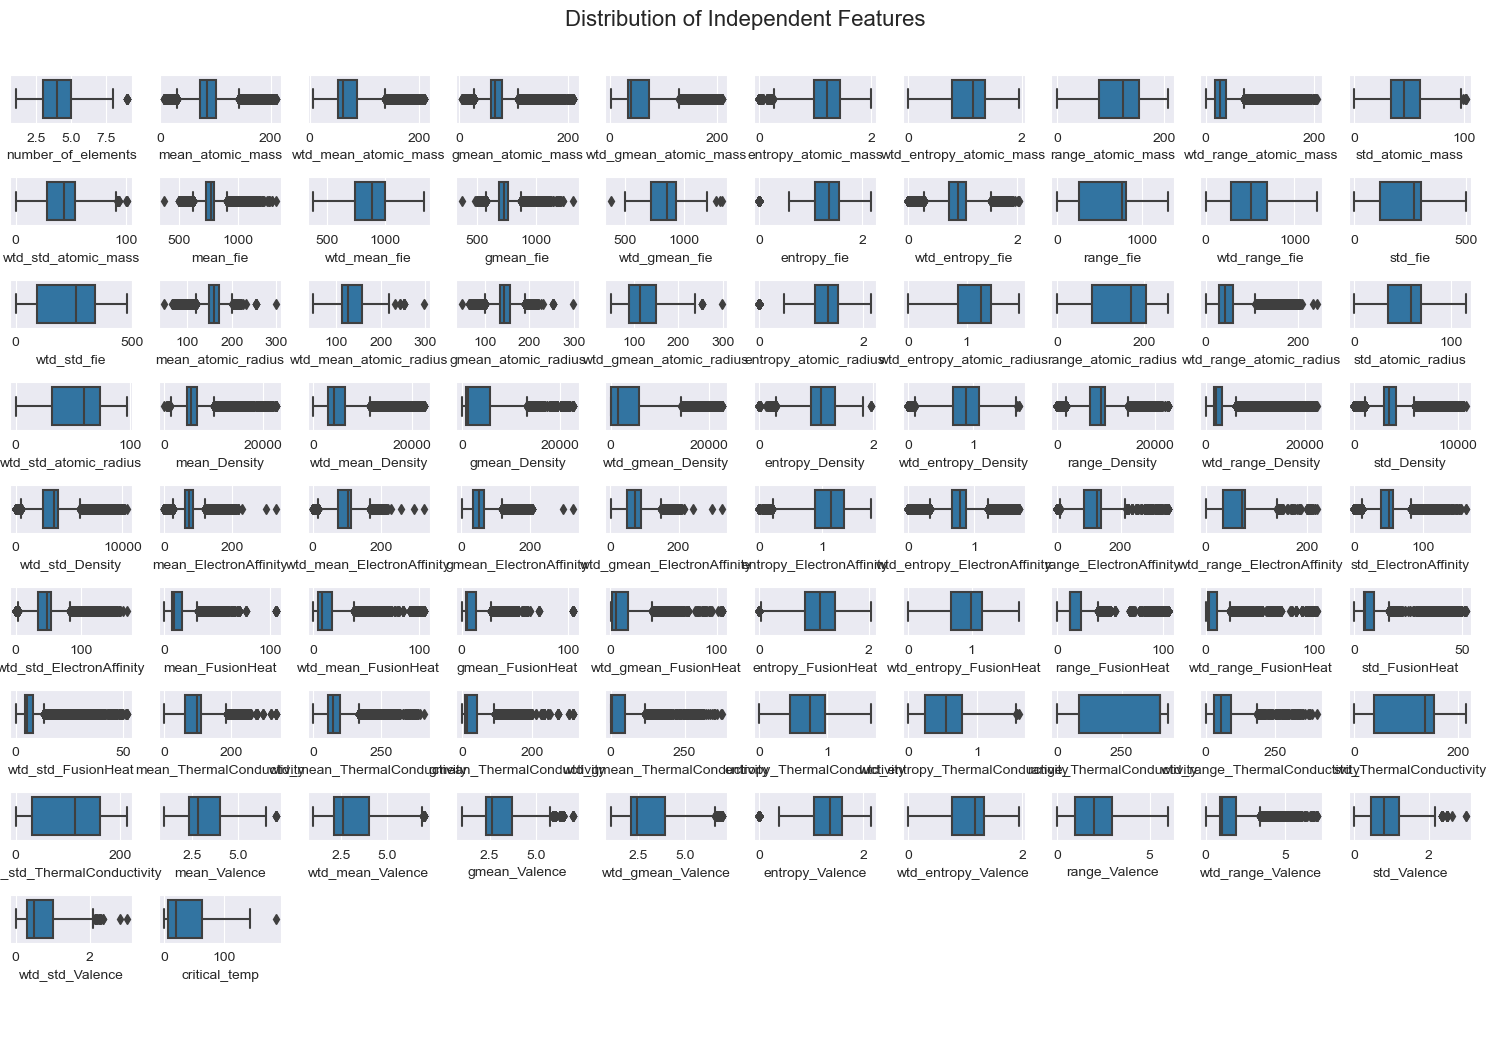

In [13]:
# Creating Box plot to see how much outliers are available in the dataset
num_features = len(df.columns)
num_rows = num_cols = int(num_features**0.5) + 1  # Calculate number of rows and columns for subplots

# Create the subplots
sns.set_style('darkgrid')
fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array for easy iteration
ax_flat = ax.flatten()

# Iterate over each column name and corresponding axis
for i, (column_name, axis) in enumerate(zip(df.columns, ax_flat)):
    if i < num_features:  # Plot only up to the number of features
        sns.boxplot(data=df, x=column_name, ax=axis)
    else:
        axis.axis('off')  # Hide empty subplots

# Hide any remaining empty subplots
for axis in ax_flat[num_features:]:
    axis.axis('off')

plt.tight_layout()
plt.suptitle('Distribution of Independent Features', fontsize=16, y=1.05)
plt.show()


### 4. Splitting Data For Training & Testing

In [14]:
# Splitting data
independent_variables = df.drop('critical_temp', axis = 1)
target_variable = df['critical_temp']

X_train, X_test, y_train, y_test = train_test_split(independent_variables, target_variable, 
                                                    test_size=0.1, random_state=10, shuffle=True)


In [15]:
# Creating training and testing dataset
train_df = pd.concat([X_train, y_train], axis = 1)
test_df = pd.concat([X_test, y_test], axis = 1)

In [16]:
# Wrtiting train and test data
train_df.to_csv('.packaged_folder/Data/train_df.csv', index = False)

test_df.to_csv('.packaged_folder/Data/test_df.csv', index = False)